In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from src.models.train_model_lr import load_data
from src.visualization.visualize import plot_confusion_matrix, show_mistakes
from src.data.utils import find_mistakes

In [2]:
DATA_PATH = "../data/processed/train250.csv"

In [3]:
# Load and split data 70/30 train/validation.
X, y = load_data(DATA_PATH)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=99, stratify=y
)

# Convert text to sparse matrix (all terms).
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Fit Logistic Regression.
c = 1.5
log_regression = LogisticRegression(max_iter=1000, C=c)
log_regression.fit(X_train_vec, y_train)

# Print accuracy.
accuracy = accuracy_score(y_val, log_regression.predict(X_val_vec))
print(
    f"Logistic regression model obtained an accuracy of {accuracy*100:.1f}% with parameter c = {c}."
)

Logistic regression model obtained an accuracy of 77.3% with parameter c = 1.5.


In [4]:
y_pred = log_regression.predict(X_val_vec)

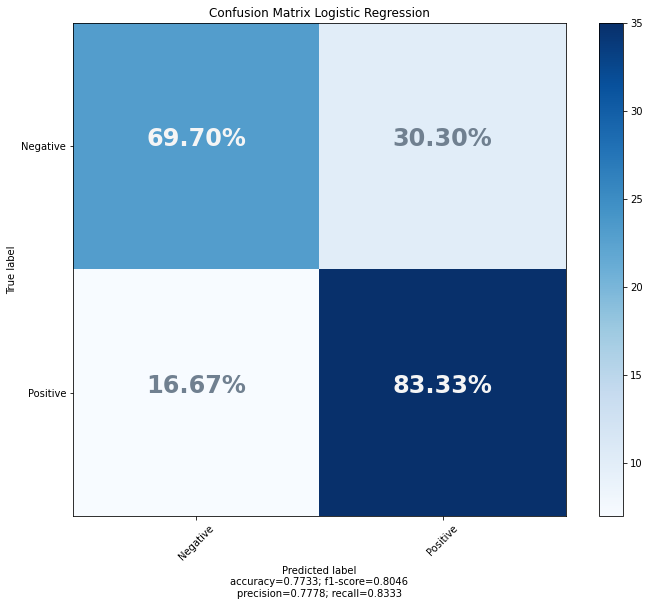

In [5]:
cm = confusion_matrix(y_val.to_numpy(), y_pred, labels=[0, 1])
plot_confusion_matrix(cm, "Confusion Matrix Logistic Regression", ['Negative', 'Positive'], save=True)

In [6]:
# Show some examples that were predicted incorrectly.
indices = find_mistakes(y_val.to_numpy(), y_pred)
show_mistakes(X_val, indices, y_pred, 5)

(not POSITIVE):product receiv time like fake one use product mani year . somehow product receiv time like fake one . thin . use doubl amount .

(not POSITIVE):technic inform book great view joint use build inform beam span load actual build build

(not NEGATIVE):henri come home ... henri back earli 70 . forti still origin . bought new one dad ill knew would get signific . henri got insecur child hope dad battl termin cancer.thank make .

(not NEGATIVE):slip 2 1/2 . heel shoe complet satisfi manner order delivered.th shoe awesom advertis show .

(not NEGATIVE):outstand guidebook build timberfram home wife built hybrid timber frame home use book guid . although construct skill , book invalu guid us process . cant wait build anoth . highli recommend book anyon consid timber frame hous .

